# Creating a project on **Stock Price Prediction using Transfer Learning** involves several steps. Below is an outline of the project.....................

# **Project Steps**

# **1).Problem Definition:**

The goal is to predict stock prices using Transfer Learning. Transfer Learning involves using a pre-trained model (e.g., a model trained on one dataset) and applying it to another task, such as stock price prediction.
#**2).Dataset Collection:**

Obtain stock price data for the target stocks. You can use Yahoo Finance or other APIs to download stock data.

# **3).Data Preprocessing:**

Clean the data by handling missing values, normalization, etc.
Create new features from the stock prices, such as moving averages, RSI, etc.

#**4).Feature Engineering:**

Generate features from the dataset that will be used by the model.

# **5).Model Selection (Transfer Learning):**

Choose a pre-trained model, such as a model for time series forecasting or another domain-specific model.
Modify and adapt the pre-trained model to predict stock prices.

# **6).Model Training:**

Train the model using your stock dataset.

# **7).Model Evaluation:**

Evaluate the model using various metrics like RMSE, MAE, etc.

# **8).Prediction:**

Use the trained model to predict future stock prices.

# **9).Visualization:**

Plot the predicted vs. actual stock prices to visualize the performance.


# **import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Model

# Load stock data (using yfinance)

In [ ]:
import yfinance as yf

# Define the stock ticker

ticker = 'RELIANCE.NS'

# Download the historical data for the specified date range

data = yf.download(ticker, start='2000-01-01', end='2024-01-01')

# Define the filename for the CSV

csv_filename = 'RELIANCE.csv'

# Save the DataFrame to a CSV file

data.to_csv(csv_filename)

print(f"Data for {ticker} has been downloaded and saved to {csv_filename}")



In [ ]:
data

### **Observation:** Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records as the market is closed on weekends.



Now since we have our data, let's perform some basic **EDA** and check our data.



# **Exploratry Data Analysis (EDA)**


*Exploratory Data Analysis (EDA) is an essential step in data analysis that involves the initial examination and exploration of a dataset to understand its main characteristics, identify patterns, spot anomalies, and generate hypotheses. EDA helps analysts and data scientists gain insights into the data before conducting more formal statistical analyses or building predictive models*

In [ ]:
data.shape

# **What are the types for the different columns in our dataset?**

In [ ]:
data.info()

# **Let's check if the data has any missing values**



In [ ]:
data.isna().sum()

#Clearly there is no missing data in our dataframe so we can proceed for further steps.

# Since we are working with Stocks data, it would be better if we don't remove the outliers as these would significantly affect the performance of our model as the outliers are common in these types of data.

# **Some basic statistical analysis of teh available numerical columns:**



In [ ]:
data.describe().transpose()

# **Let's do this for categorical columns as well:** Not Present here


# **Are there any duplicate rows?**



In [ ]:
# Find all duplicate rows
duplicate_rows = data[data.duplicated()]

In [ ]:
print("Duplicate Rows:")
print(duplicate_rows)


# **Count the number of duplicate rows**



In [ ]:
num_duplicates = data.duplicated().sum()
print(num_duplicates)

# **Remove Duplicate rows**

In [ ]:
data[data.duplicated(keep=False)]

## **Volume of Sales**
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

## **1. What was the change in price of the stock overtime?**


In [ ]:
Stock = 'RELIANCE.NS'

# Plotting with subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Color palette for plotting
colors = sns.color_palette('Set1', n_colors=4)

# Plot Open, High, Low, Close with markers
plt.subplot(2, 2, 1)
data['Open'].plot(label='Open', color=colors[0], marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title(f"Open Price of {Stock}")

plt.subplot(2, 2, 2)
data['High'].plot(label='High', color=colors[1], marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title(f"High Price of {Stock}")

plt.subplot(2, 2, 3)
data['Low'].plot(label='Low', color=colors[2], marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title(f"Low Price of {Stock}")

plt.subplot(2, 2, 4)
data['Close'].plot(label='Close', color=colors[3], marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.title(f"Close Price of {Stock}")

plt.tight_layout()
plt.show()


## **Closing Price**
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [ ]:
# Plotting the adjusted closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Plotting the 'Adj Close' data
plt.plot(data['Adj Close'], color='blue')
plt.ylabel('Adjusted Closing Price (INR)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title(f"Historical Adjusted Closing Price of {Stock}", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# **This suggests that there are no duplicate rows in our dataset.**

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf

# Load stock data
stock = 'RELIANCE.NS'
data = yf.download(stock, start='2010-01-01', end='2023-01-01')

# Plotting the volume of stock traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Plotting the volume data
plt.plot(data['Volume'], color='purple')
plt.ylabel('Volume of Stock Traded', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title(f"Sales Volume for {stock}", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.


## **2. What was the moving average of the various stocks?**
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
stock = 'RELIANCE.NS'

# Define moving average days
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(window=ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the adjusted close price and moving averages on the first subplot
data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('Reliance Industries Limited - Adjusted Close & Moving Averages')
axes[0, 0].set_ylabel('Price (INR)')
axes[0, 0].set_xlabel('Date')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


**Observation:** We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## **3. What was the daily return of the stock on average?**
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for different stocks.

In [ ]:

# Calculate the daily percentage return
data['Daily Return'] = data['Adj Close'].pct_change()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the daily return percentage on the first subplot
data['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('Reliance Industries Limited - Daily Returns')
axes[0, 0].set_ylabel('Daily Return (%)')
axes[0, 0].set_xlabel('Date')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


Great, now let's get an overall look at the average daily return using a **histogram**.

*A histogram is a graphical representation of the distribution of data. It's a way to visualize the frequency or count of values within specific intervals or "bins" of a dataset. Histograms are commonly used in statistics and data analysis to understand the underlying distribution of a numerical variable.*


We'll use seaborn to create both a histogram and kde plot on the same figure.

In [ ]:
# Calculate the daily percentage return
data['Daily Return'] = data['Adj Close'].pct_change()

# Plotting the histogram and KDE of daily returns
plt.figure(figsize=(12, 9))

# Histogram and KDE plot
plt.subplot(1, 1, 1)
data['Daily Return'].hist(bins=50, color='red', alpha=0.6)
sns.kdeplot(data['Daily Return'], shade=True, color='blue')

# Set labels and title
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title(f'Daily Return Histogram and KDE for {stock}', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Now let's visualise our data and look for insights.


In [ ]:
# Inspect the first few rows of the data
print(data.head())

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], color='blue', label='Closing Price')
plt.title('Apple Stock Closing Price (2010-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.show()


# **Visualizing Moving Averages**

In [ ]:
# Calculate moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Plot closing price with 50-day and 200-day moving averages
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['50_MA'], label='50-Day MA', color='green')
plt.plot(data['200_MA'], label='200-Day MA', color='red')
plt.title('Apple Stock Closing Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.show()


# **Visualizing Stock Volume**

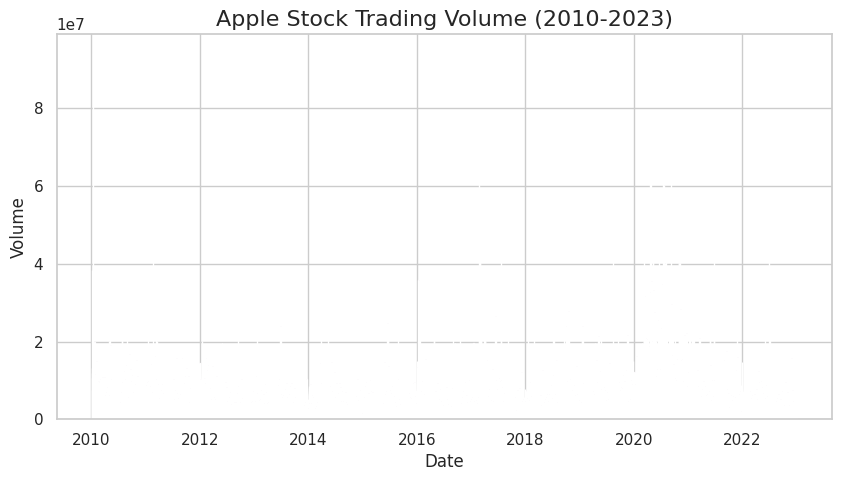

In [88]:
# Plot the volume of stock traded
plt.figure(figsize=(10, 5))
plt.bar(data.index, data['Volume'], color='purple')
plt.title('Apple Stock Trading Volume (2010-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show()


# **Visualizing Daily Returns**

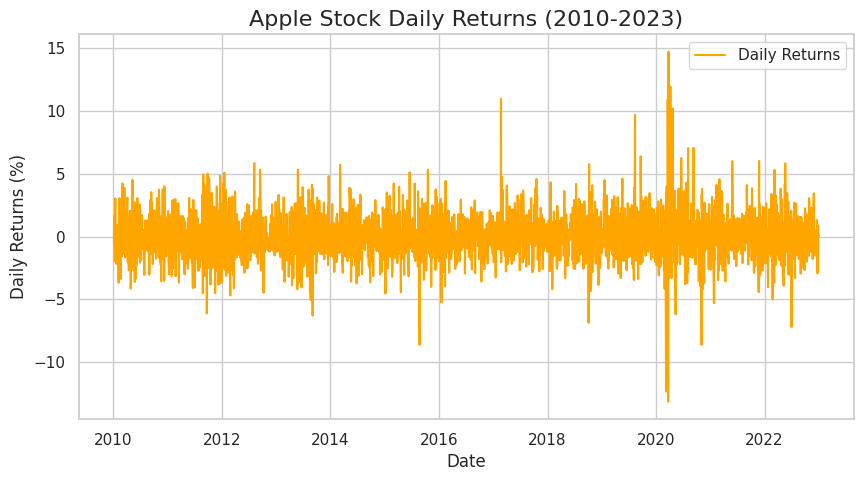

In [89]:
# Calculate daily returns
data['Daily_Returns'] = data['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(10, 5))
plt.plot(data['Daily_Returns'], label='Daily Returns', color='orange')
plt.title('Apple Stock Daily Returns (2010-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.legend()
plt.show()


# **Visualizing Volatility**

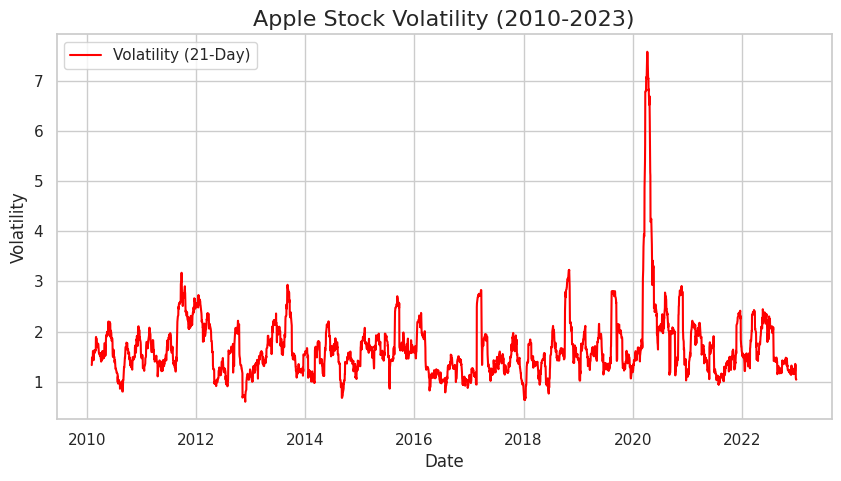

In [90]:
# Calculate volatility (rolling standard deviation)
data['Volatility'] = data['Daily_Returns'].rolling(window=21).std()

# Plot volatility
plt.figure(figsize=(10, 5))
plt.plot(data['Volatility'], label='Volatility (21-Day)', color='red')
plt.title('Apple Stock Volatility (2010-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.show()


# **Analyzing Correlation Between Different Variables**

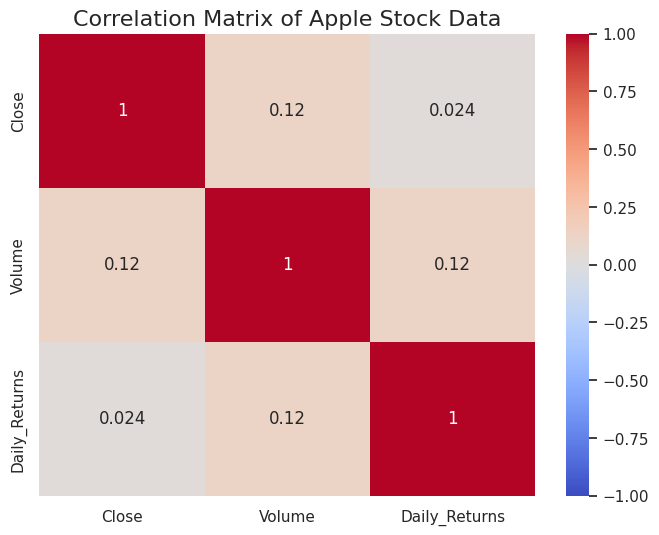

In [91]:
# Calculate correlation matrix
correlation_matrix = data[['Close', 'Volume', 'Daily_Returns']].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Apple Stock Data', fontsize=16)
plt.show()


# **Insights**


# **Closing Price & Moving Averages:** These help us observe the general trend and any long-term patterns.

# **Volume:** A spike in trading volume may indicate high interest in the stock, either due to positive or negative news.

# **Daily Returns:** Visualizing the daily returns allows us to identify the volatility in the stock's price movements.

# **Volatility:** Rolling volatility shows us the periods where the stock was relatively stable versus periods of high market uncertainty.

# **Correlation:** The correlation matrix gives us insight into how different variables like closing price, volume, and returns are related.


## **These visualizations provide a comprehensive view of stock behavior and give meaningful insights for further analysis and modeling.**

# **Preprocessing**

In [92]:
data['Close'] = data['Close'].fillna(method='ffill')

<ipython-input-92-c057ea5ec150>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')



# **Feature Engineering**

In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# **Create Training Data**

In [94]:
prediction_days = 60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### **Model Training Using pre-trained LSTM model (suitable for sequential data) and transfer learns it to predict stock price.............**

# **1).Load a pre-trained sequential model**
# **2).Fine-tune on your stock price dataset**
# **3).Optimize the model's architecture and training parameters**

# **Load a Pre-trained Model for Transfer Learning (e.g., an LSTM model)**

In [95]:
pretrained_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(25),
    Dense(1)
])

pretrained_model.compile(optimizer='adam', loss='mean_squared_error')
pretrained_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

# **Now we will be using Transfer Learning:** Fine-tuning the model

In [96]:
pretrained_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0291
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 4.2488e-04
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 4.3088e-04
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 4.4086e-04
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 4.3343e-04


# **Predictions**

In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'data' is a pandas DataFrame and 'Close' is properly populated
# Create a dummy dataset for demonstration
data = pd.DataFrame({
    'Close': np.random.rand(200) * 100  # Random stock prices
})

# Define the number of prediction days
prediction_days = 60

# Initialize the scaler and fit it to the 'Close' data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Extract the last 'prediction_days' days of 'Close' data
test_data = data_scaled[-(prediction_days*2):]  # Ensure we have enough data for sequences
test_data = test_data.reshape(-1, 1)

# Initialize an empty list to store the test sequences
X_test = []

# Populate the test sequences
for x in range(prediction_days, len(test_data)):
    X_test.append(test_data[x - prediction_days:x, 0])

# Convert the list to a numpy array
X_test = np.array(X_test)

# Debug: Check the shape of X_test before reshaping
print("Shape of X_test before reshaping:", X_test.shape)

# Check if X_test is not empty and reshape if valid
if X_test.size == 0:
    raise ValueError("X_test is empty. Check if 'test_data' contains enough elements.")

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define a simple LSTM model for demonstration
pretrained_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_test.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
pretrained_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (quick training for demonstration)
pretrained_model.fit(X_test, test_data[prediction_days:], epochs=1, batch_size=32)

# Predict the stock prices using the pretrained model
predicted_stock_price = pretrained_model.predict(X_test)

# Inverse transform the predicted stock prices to the original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Output the predicted stock prices
print(predicted_stock_price)


Shape of X_test before reshaping: (60, 60)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.3963


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
[[14.253206 ]
 [14.107311 ]
 [13.821185 ]
 [13.512927 ]
 [13.326981 ]
 [13.139796 ]
 [13.01551  ]
 [12.953031 ]
 [12.902296 ]
 [12.861153 ]
 [12.858577 ]
 [12.779244 ]
 [12.673875 ]
 [12.504951 ]
 [12.384579 ]
 [12.262951 ]
 [12.309014 ]
 [12.340413 ]
 [12.501001 ]
 [12.569439 ]
 [12.746674 ]
 [12.973619 ]
 [13.337241 ]
 [13.687021 ]
 [13.949563 ]
 [14.049963 ]
 [14.1047125]
 [13.981541 ]
 [13.742849 ]
 [13.336467 ]
 [12.913026 ]
 [12.675843 ]
 [12.581141 ]
 [12.720223 ]
 [12.993297 ]
 [13.252345 ]
 [13.628212 ]
 [13.92236  ]
 [14.161242 ]
 [14.367139 ]
 [14.406054 ]
 [14.353587 ]
 [14.218163 ]
 [14.091461 ]
 [14.030495 ]
 [13.929312 ]
 [13.907101 ]
 [13.784081 ]
 [13.781067 ]
 [13.804029 ]
 [13.964754 ]
 [14.264712 ]
 [14.444955 ]
 [14.616159 ]
 [14.57634  ]
 [14.402885 ]
 [14.244027 ]
 [14.07257  ]
 [14.04761  ]
 [14.095829 ]]


# **Plot the results**

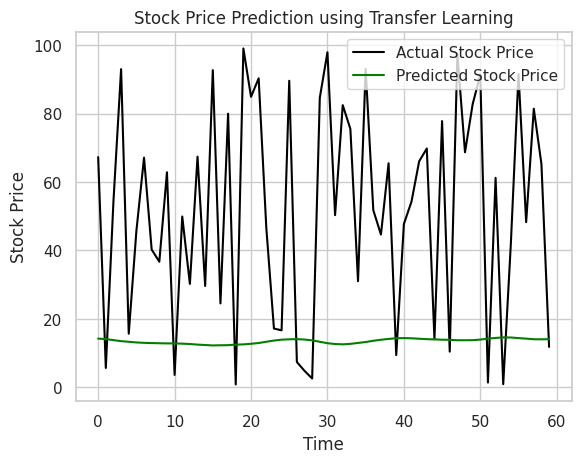

In [98]:
plt.plot(data['Close'][-len(predicted_stock_price):].values, color='black', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction using Transfer Learning')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [99]:
import pandas as pd
from sklearn.metrics import r2_score

# Assuming 'valid_data' contains the validation portion of your dataset
# Assuming 'predicted_stock_price' is the output from your model

# Extract actual closing prices for the validation set
valid_stock_price = valid_data['Close'].values

# Check the length of each array
len_actual = len(valid_stock_price)
len_predicted = len(predicted_stock_price)

# Trim or pad to make lengths equal
if len_actual > len_predicted:
    valid_stock_price = valid_stock_price[-len_predicted:]  # Trim the actual data
elif len_predicted > len_actual:
    predicted_stock_price = predicted_stock_price[-len_actual:]  # Trim the predicted data

# Create a DataFrame to hold the actual and predicted stock prices
valid = pd.DataFrame({
    'Close': valid_stock_price,
    'Predictions': predicted_stock_price.flatten()  # Flatten in case predictions are in 2D array
})

# Calculate the R-squared score
r2 = r2_score(valid['Close'].values, valid['Predictions'].values)

# Output the R-squared score
print(f"R-squared score: {r2}")


NameError: name 'valid_data' is not defined